In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler,LabelBinarizer
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [73]:
df=pd.read_csv(r'ds_dataset_test.csv')

In [74]:
missing_values = df.isnull().sum()
data_types = df.dtypes

missing_values, data_types

(user_id                0
 total_stream           0
 normal_clips           0
 downloaded_clips       0
 shared_clips           0
 edited_clips           0
 avg_waiting_time       0
 days_active            0
 total_spent_minutes    0
 join_via               0
 days_in_premium        0
 churn_status           0
 dtype: int64,
 user_id                  int64
 total_stream           float64
 normal_clips           float64
 downloaded_clips       float64
 shared_clips           float64
 edited_clips           float64
 avg_waiting_time       float64
 days_active            float64
 total_spent_minutes    float64
 join_via                object
 days_in_premium          int64
 churn_status           float64
 dtype: object)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2617137608.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2617137608.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2617137608.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2617137608.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2617137608.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2617137608.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23632\2617137608.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppDat

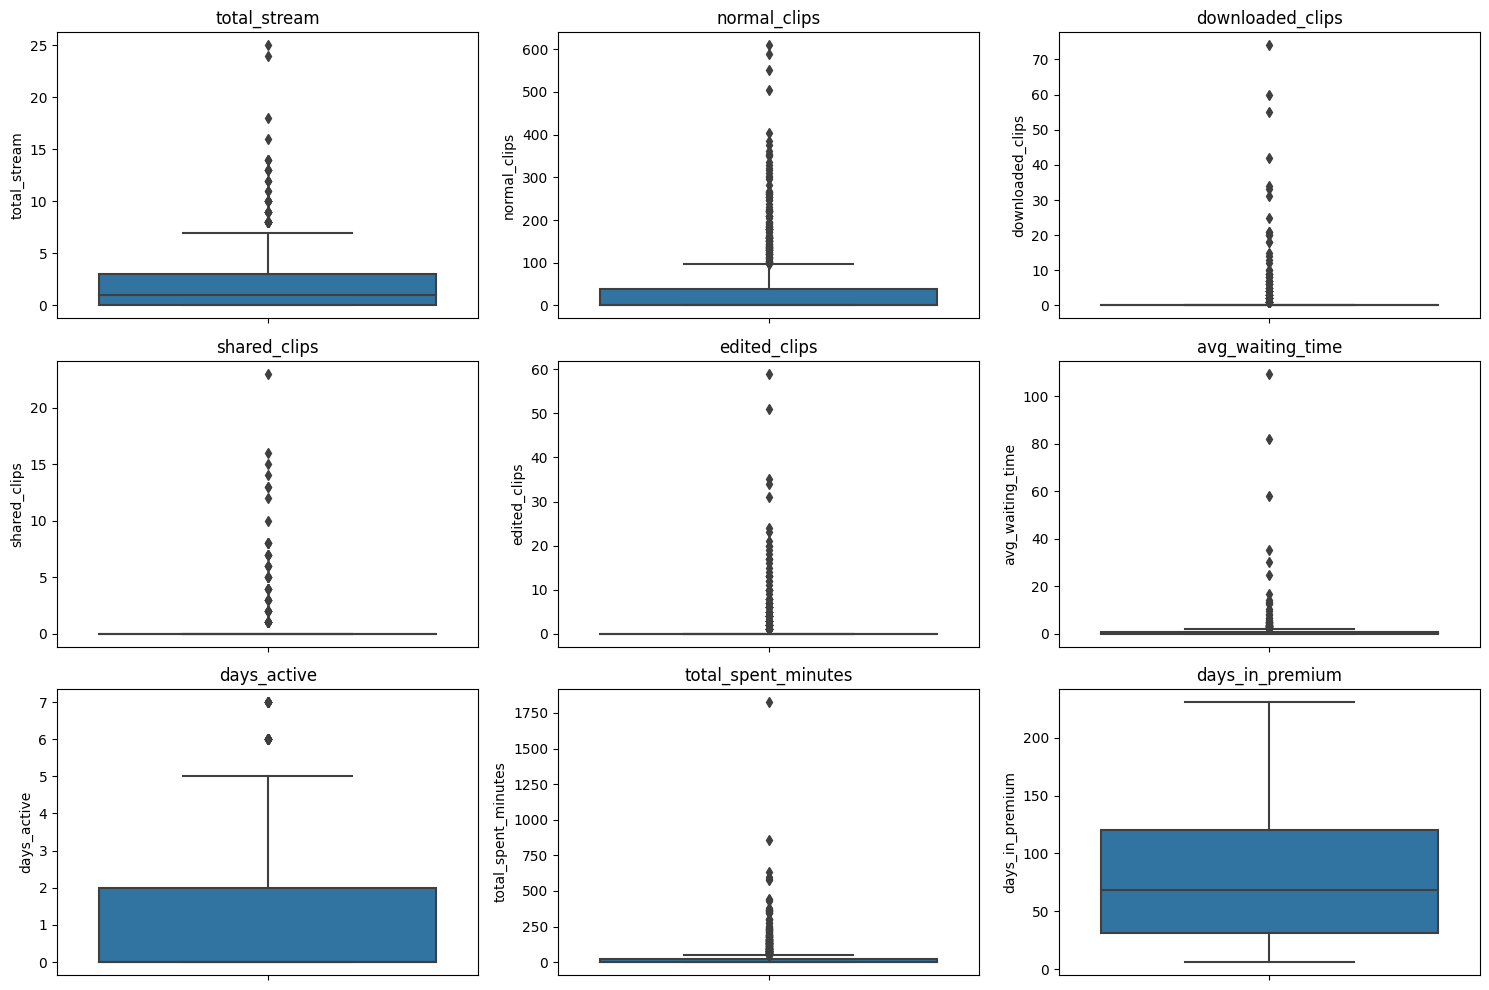

In [75]:
continuous_features = [
    'total_stream', 'normal_clips', 'downloaded_clips', 'shared_clips', 
    'edited_clips', 'avg_waiting_time', 'days_active', 'total_spent_minutes', 'days_in_premium'
]

# Plot boxplots for each continuous feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
    plt.tight_layout()
plt.show()

In [76]:
df_encoded = pd.get_dummies(df, columns=["join_via"], drop_first=True)

# Define the dependent variable (churn_status) and independent variables (features)
y = df_encoded["churn_status"]
X = df_encoded.drop(columns=["user_id","churn_status"])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
scores = cross_val_score(logistic_model, X, y, cv=5)


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy: 0.95
ROC AUC: 0.43

Confusion Matrix:
[[191   0]
 [  9   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       191
         1.0       0.00      0.00      0.00         9

    accuracy                           0.95       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.91      0.95      0.93       200


Cross validation score:
[0.935 0.93  0.93  0.93  0.93 ]


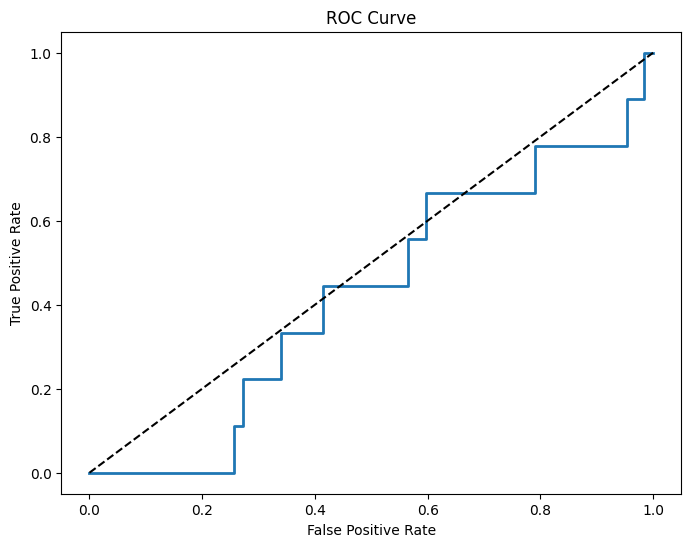

In [80]:
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
print("\nCross validation score:")
print(scores)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**_The accruracy point is 95%, which is quite remarkable.

_However, it is need to measure the reliability of the model.

_With the ROC AUC score is 43%, quite low, it indicates that the model fails to distinguish who is going to cancel premium or not.

_Dwell deeper into the valuation score, with the recall is 1 for not cancelled, and 0 for cancelled.
**

**_From the matrix you provided:

True Negative (TN) = 191
False Positive (FP) = 0
False Negative (FN) = 9
True Positive (TP) = 0

The model has not made any positive predictions (both TP and FP are 0).
The model seems to be biased towards predicting the "Negative" class, as it always predicts "Negative".
There are 9 instances where the true label was "Positive" but the model incorrectly predicted "Negative".**

** Classification Report:

The model is very accurate (95%) in predicting the negative class (0.0), but it completely fails to predict the positive class (1.0). This is evident from the precision, recall, and F1-score of 0 for class 1.0.

The overall high accuracy (95%) can be misleading. In situations with imbalanced datasets (like this one with 191 negative cases and only 9 positive cases), accuracy is not a good metric to solely rely on. The F1-score, precision, and recall give a more holistic view of the model's performance.

The model might need further tuning or a different approach to improve its performance on the positive class, especially if predicting the positive class is important for the application. **

** Conclusion:
There is a need of improvement of data processing for this regression model
There are few techniques we can apply: Under sampling, Over Sampling and SMOTE **

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

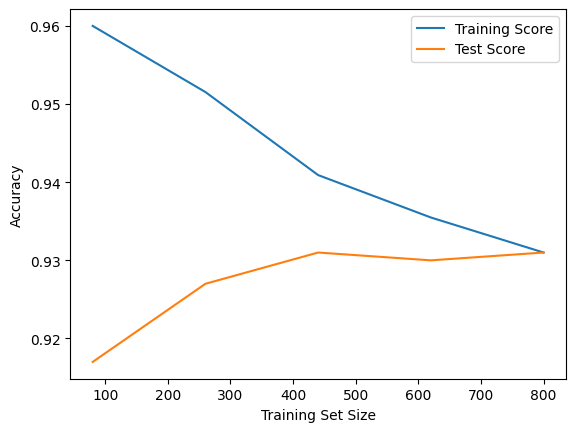

<Figure size 640x480 with 0 Axes>

In [8]:
#learning_curve
train_sizes, train_scores, test_scores = learning_curve(logistic_model, X, y, cv=5)

# Plot learning curve
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('learningcurve.png')

In [9]:
coefficients = logistic_model.coef_[0]
feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)
print(feature_coefficients)


                           Feature  Coefficient
12  join_via_mobile_Chrome_Android     0.311155
11                join_via_Desktop     0.194641
10            join_via_App_android     0.114855
14      join_via_mobile_Safari_IOS     0.003754
13      join_via_mobile_Chrome_IOS    -0.033116
4                     edited_clips    -0.109050
2                 downloaded_clips    -0.126038
15   join_via_mobile_other_Android    -0.145738
8                  days_in_premium    -0.173703
7              total_spent_minutes    -0.177883
5                 avg_waiting_time    -0.279206
9                 join_via_App_IOS    -0.301533
3                     shared_clips    -0.330729
0                     total_stream    -0.342372
6                      days_active    -0.463352
1                     normal_clips    -0.499489


<Axes: xlabel='Feature'>

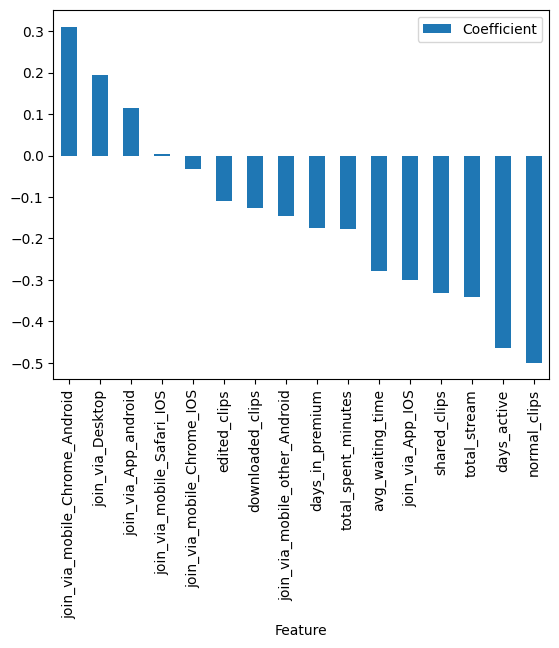

In [10]:
feature_coefficients.plot(x='Feature',y='Coefficient',kind='bar')

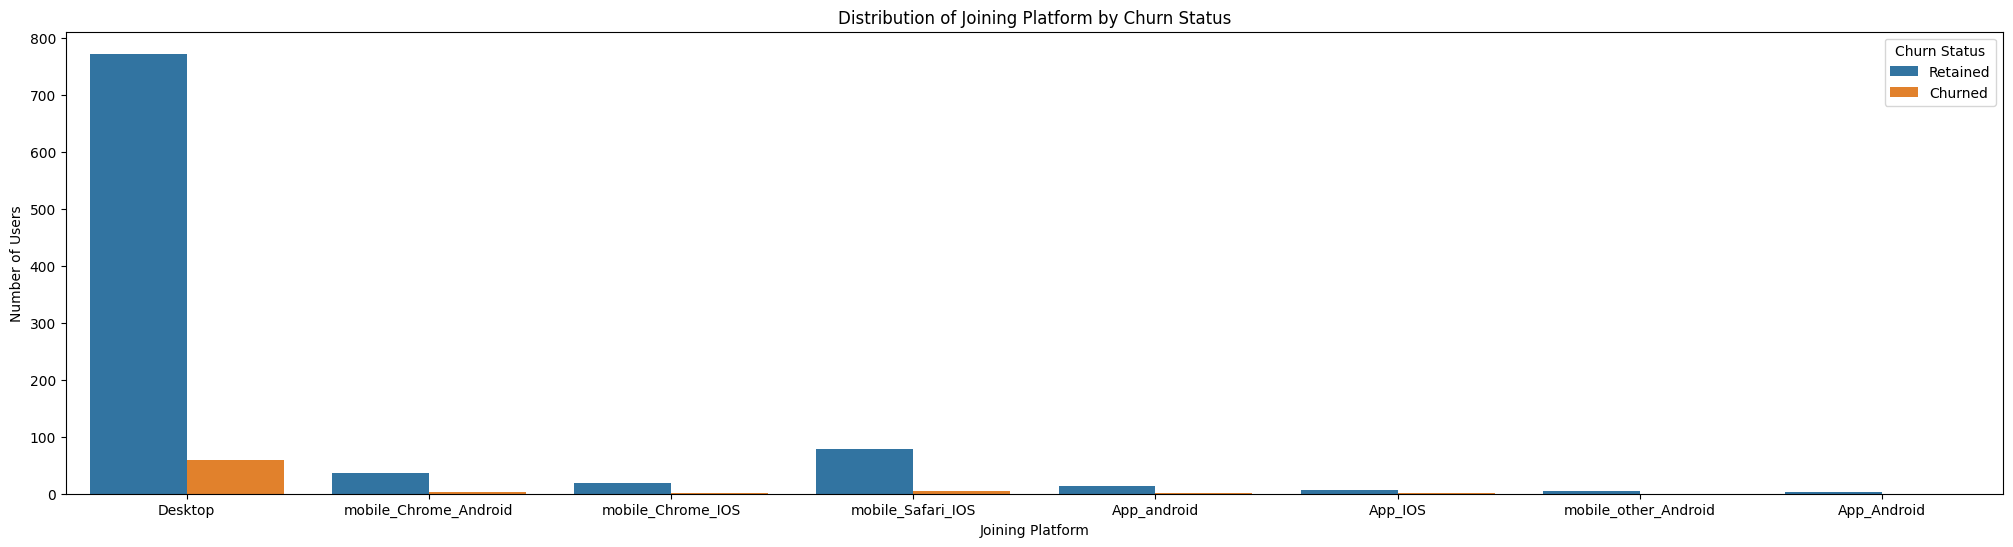

In [14]:
plt.figure(figsize=(25, 6))
sns.countplot(data=df, x='join_via', hue='churn_status')
plt.title('Distribution of Joining Platform by Churn Status')
plt.xlabel('Joining Platform')
plt.ylabel('Number of Users')
plt.legend(title='Churn Status', labels=['Retained', 'Churned'])
plt.show()

**# #### SMOTE technique**

**Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority class. This technique creates synthetic examples in the feature space, leading to a balanced distribution**

In [54]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE

In [63]:
#Count before overspampling technique apply, to see the distribution of dataset
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# pip install imblearn (if you don't have imblearn in your system)
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

#Shape of train X,y after apply technique :
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

#Distribution of class 0,1 after oversampling:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 60
Before OverSampling, counts of label '0': 740 

After OverSampling, the shape of train_X: (1480, 16)
After OverSampling, the shape of train_y: (1480,) 

After OverSampling, counts of label '1': 740
After OverSampling, counts of label '0': 740


**Before the SMOTE, the number of 1 is 60, while the number of 740, which is quite bias too 0.
After the over sampling, the number of 1 have increased reached to the same level as 0, which makes the data much more balanced than before**

**Then we train and evaluate the model**

In [82]:
#Train Model and make prediction

lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)

smote_accuracy = accuracy_score(y_test, predictions)
smote_roc_auc = roc_auc_score(y_test, y_pred_prob)
smote_classification_report=classification_report(y_test, predictions)
conf_matrix_smote = confusion_matrix(y_test, predictions)
#Evaluate model
print(f"Accuracy: {smote_accuracy:.2f}")
print(f"ROC AUC: {smote_roc_auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_smote)
print(smote_classification_report)

Accuracy: 0.46
ROC AUC: 0.43

Confusion Matrix:
[[ 85 106]
 [  3   6]]
              precision    recall  f1-score   support

         0.0       0.97      0.45      0.61       191
         1.0       0.05      0.67      0.10         9

    accuracy                           0.46       200
   macro avg       0.51      0.56      0.35       200
weighted avg       0.92      0.46      0.59       200



**Although recall of minority (Cancelled) prediction has improved significantly to 67%, the recall of 0 has declined more than half**

**The accuracy is quite low with 46%**

**Therefore SMOTE is not an appropriate model for for this dataset**

**# Using Random Oversampling technique:**

**Involves randomly duplicating examples in the minority class**

In [65]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = df[df.churn_status == 0]
df_minority = df[df.churn_status == 1]

# Upsample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=df_majority.shape[0],
                                 random_state=42)

# Combine the majority class with the upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Check the distribution of the target variable after random oversampling
upsampled_churn_distribution = df_upsampled['churn_status'].value_counts(normalize=True)

upsampled_churn_distribution

churn_status
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

In [97]:
features_to_transform = [
    'total_stream', 'normal_clips', 'downloaded_clips', 'shared_clips', 'edited_clips',
    'avg_waiting_time', 'days_active', 'total_spent_minutes'
]

# Apply log transformation
for feature in features_to_transform:
    df_upsampled[feature] = np.log1p(df_upsampled[feature])  # log1p = log(x + 1)

df_encoded = pd.get_dummies(df_upsampled, columns=['join_via'], drop_first=True)
features_to_scale = df_encoded.columns.difference(['user_id', 'churn_status'])

# Initialize the standard scaler
scaler = StandardScaler()

# Apply the scaler
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

X = df_encoded.drop(columns=['user_id', 'churn_status'])
y = df_encoded['churn_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
over_accuracy = accuracy_score(y_test, y_pred)
over_roc_auc = roc_auc_score(y_test, y_prob)
over_classification_rep = classification_report(y_test, y_pred)


print(f"Accuracy: {over_accuracy:.2f}")
print(f"\nROC AUC: {over_roc_auc:.2f}")
print("\n Report:",over_classification_rep)

Accuracy: 0.60

ROC AUC: 0.64

 Report:               precision    recall  f1-score   support

         0.0       0.60      0.60      0.60       280
         1.0       0.60      0.59      0.60       279

    accuracy                           0.60       559
   macro avg       0.60      0.60      0.60       559
weighted avg       0.60      0.60      0.60       559



**Incredibly, Accuracy and ROC AUC score improved from under 50% to over 60% for each**

**The prediction of 0 class was much more accurate, while the one of churn class slightly reduced, giving the more balance in prediction between 2 classes**

**This is a promising technique for balance dataset**

**Apply Random Undersampling technique**

In [107]:
df_majority = df[df.churn_status == 0]
df_minority = df[df.churn_status == 1]

# Random undersampling of the majority class
df_majority_undersampled = resample(df_majority, 
                                    replace=False,
                                    n_samples=df_minority.shape[0],
                                    random_state=42)

# Combine the undersampled majority class with the minority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Check the distribution of the target variable after random undersampling
undersampled_churn_distribution = df_undersampled['churn_status'].value_counts(normalize=True)

undersampled_churn_distribution

churn_status
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

In [108]:
features_to_transform = [
    'total_stream', 'normal_clips', 'downloaded_clips', 'shared_clips', 
    'edited_clips', 'avg_waiting_time', 'days_active', 'total_spent_minutes'
]

# Preprocessing steps

# Apply log transformation
for feature in features_to_transform:
    df_undersampled[feature] = np.log1p(df_undersampled[feature])

# One-hot encode the 'join_via' feature
df_undersampled_encoded = pd.get_dummies(df_undersampled, columns=['join_via'], drop_first=True)

# Scale the features using standard scaler
features_to_scale = df_undersampled_encoded.columns.difference(['user_id', 'churn_status'])
scaler = StandardScaler()
df_undersampled_encoded[features_to_scale] = scaler.fit_transform(df_undersampled_encoded[features_to_scale])

# Splitting the data into training and testing sets
X_undersampled = df_undersampled_encoded.drop(columns=['user_id', 'churn_status'])
y_undersampled = df_undersampled_encoded['churn_status']

X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(
    X_undersampled, y_undersampled, test_size=0.3, random_state=42)

# Train a logistic regression model
logreg_undersampled = LogisticRegression(max_iter=1000, random_state=42)
logreg_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Predict on the testing set
y_pred_undersampled = logreg_undersampled.predict(X_test_undersampled)
y_prob_undersampled = logreg_undersampled.predict_proba(X_test_undersampled)[:, 1]
under_classification_rep = classification_report(y_test_undersampled, y_pred_undersampled)

In [109]:
under_accuracy = accuracy_score(y_test, y_pred_undersampled)
under_roc_auc = roc_auc_score(y_test, y_prob_undersampled)

print(f"Accuracy: {under_accuracy:.2f}")
print(f"\nROC AUC: {under_roc_auc:.2f}")
print("\nUnder sampling technique:")
print("\nReport: \n",under_classification_rep)

ValueError: Found input variables with inconsistent numbers of samples: [559, 42]

**With this method, because we reduce the amount of majority class, the prediction performance for this class is poor (32%).While, prediction of minority class was only about 50%**

**In addition, macro avg and weighted avg also idicate that how poorly this method operate**

**This method is not suitable for the dataset**

**Comparision**

In [70]:
print("Accuracy:",accuracy)
print("\nROC AUC",roc_auc)
print("\nUnder sampling technique:")
print(under_classification_rep)
print("\nOver sampling technique:")
print(over_classification_rep)
print("\nSMOTE sampling technique:")
print(smote_classification_report)

Accuracy: 0.6010733452593918

ROC AUC 0.6418138760880696

Under sampling technique:
              precision    recall  f1-score   support

         0.0       0.41      0.32      0.36        22
         1.0       0.40      0.50      0.44        20

    accuracy                           0.40        42
   macro avg       0.41      0.41      0.40        42
weighted avg       0.41      0.40      0.40        42


Over sampling technique:
              precision    recall  f1-score   support

         0.0       0.62      0.54      0.58       280
         1.0       0.59      0.66      0.62       279

    accuracy                           0.60       559
   macro avg       0.60      0.60      0.60       559
weighted avg       0.60      0.60      0.60       559


SMOTE sampling technique:
              precision    recall  f1-score   support

         0.0       0.97      0.45      0.61       191
         1.0       0.05      0.67      0.10         9

    accuracy                           0.46  

**Overall, random oversampling technique has achieved the best result of 3 approaches**

**Let's see how each feture affects the user's decision based on the result of above forecast model**

In [85]:
#Calculate coefficient of each feature

coefficients = logreg.coef_[0]
feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)

#Print the outcomes
print(feature_coefficients)


                           Feature  Coefficient
11                join_via_Desktop     0.580639
6                      days_active     0.452026
12  join_via_mobile_Chrome_Android     0.290937
10            join_via_App_android     0.282519
14      join_via_mobile_Safari_IOS     0.212129
0                     total_stream     0.209069
13      join_via_mobile_Chrome_IOS     0.166618
9                 join_via_App_IOS     0.135407
4                     edited_clips     0.084091
1                     normal_clips    -0.027233
2                 downloaded_clips    -0.045342
3                     shared_clips    -0.096033
15   join_via_mobile_other_Android    -0.181193
8                  days_in_premium    -0.295436
7              total_spent_minutes    -0.503600
5                 avg_waiting_time    -0.556703


**Draw conclusion**

**Fascinatingly, the customers using app on Desktop tend to cancel discription the most**

**The more day active, the less attractive the app toward the users**

**There are some issues with the app on Android that discourage premium subcribers maintain there sub**


**Average waiting time is not the main setback of the app, infact, the more waiting the more tendency the customer do not cancel sub**

**The increase in time spending with app, the more Users do not want to quit (due to loss adverse mentality)**



**Sugestion**

**It is nessessory to resolve problems that Desktop and Android user are facing**

**Improve content and features of the app to keep the users using is very important**


**## Z-score**

In [40]:
from scipy.stats import zscore

# Reload the dataset
dataset = pd.read_csv('ds_dataset_test.csv')

# Continuous features for which we'll check for outliers
continuous_features = [
    'total_stream', 'normal_clips', 'downloaded_clips', 'shared_clips', 
    'edited_clips', 'avg_waiting_time', 'days_active', 'total_spent_minutes', 'days_in_premium'
]

# Calculate Z-scores for continuous features
z_scores = np.abs(zscore(dataset[continuous_features]))

# Define a threshold to identify an outlier
threshold = 3

# Get boolean array indicating the presence of outliers
outliers = (z_scores > threshold)

# Display the number of outliers for each feature
num_outliers = pd.DataFrame(outliers, columns=continuous_features).sum()

def cap_and_replace_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping
    data.loc[data[feature] > upper_bound, feature] = upper_bound
    data.loc[data[feature] < lower_bound, feature] = lower_bound
    
    # Replacing with median
    median_value = data[feature].median()
    data.loc[(data[feature] == upper_bound) | (data[feature] == lower_bound), feature] = median_value

# Apply the function to each continuous feature
for feature in continuous_features:
    cap_and_replace_outliers(dataset, feature)

# Display the first few rows of the dataset after handling outliers
dataset.head()


,user_id,total_stream,normal_clips,downloaded_clips,shared_clips,edited_clips,avg_waiting_time,days_active,total_spent_minutes,join_via,days_in_premium,churn_status
0,45745320,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Desktop,98.0,0.0
1,36485256,4.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Desktop,36.0,0.0
2,52614000,1.0,0.0,0.0,0.0,0.0,1.378232,3.0,0.0,Desktop,84.0,0.0
3,43295328,1.0,28.0,0.0,0.0,0.0,0.886389,0.0,0.0,Desktop,120.0,0.0
4,70911240,1.0,28.0,0.0,0.0,0.0,0.770370,0.0,0.0,Desktop,16.0,1.0


In [42]:
for feature in features_to_transform:
    dataset[feature] = np.log1p(dataset[feature])

# One-hot encode the 'join_via' feature
dataset_encoded = pd.get_dummies(dataset, columns=['join_via'], drop_first=True)

# Scale the features using standard scaler
features_to_scale = dataset_encoded.columns.difference(['user_id', 'churn_status'])
scaler = StandardScaler()
dataset_encoded[features_to_scale] = scaler.fit_transform(dataset_encoded[features_to_scale])

# Splitting the data into training and testing sets
X = dataset_encoded.drop(columns=['user_id', 'churn_status'])
y = dataset_encoded['churn_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
logreg_processed = LogisticRegression(max_iter=1000, random_state=42)
logreg_processed.fit(X_train, y_train)

# Predict on the testing set
y_pred_processed = logreg_processed.predict(X_test)
y_prob_processed = logreg_processed.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy_processed = accuracy_score(y_test, y_pred_processed)
roc_auc_processed = roc_auc_score(y_test, y_prob_processed)
classification_rep_processed = classification_report(y_test, y_pred_processed)

accuracy_processed, roc_auc_processed,
print(classification_rep_processed)

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       278
         1.0       0.00      0.00      0.00        22

    accuracy                           0.93       300
   macro avg       0.46      0.50      0.48       300
weighted avg       0.86      0.93      0.89       300



c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo